# Multiomics BRDC Paper — Figure 1

This Jupyter Notebook (with Python 3 kernel) contained the code of the proteogenomic analysis among all stages in the BRDC

Input files:  
* The clinical file: clinical.csv
* The genome copy number file: cnv.csv

Output figures and tables:  
* Figure 1C, 1D, 1E

In [1]:
from brdc_utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
outpath = '../figure/fig1'
if not os.path.isdir(outpath):
    os.mkdir(outpath)

clinical = pd.read_csv('../document/clinical.csv', index_col=0)
cnv = pd.read_csv('../document/cnv.csv', index_col=0)

cnv = cnv.rename_axis('cnv').rename_axis('Exp', axis=1)

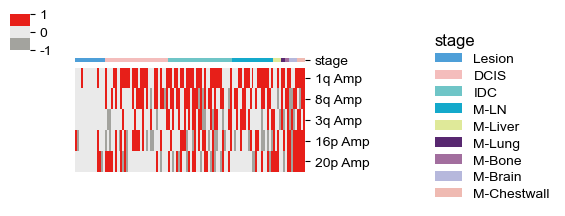

In [3]:
# Figure 1E (left panel)

order_ = ['Lesion', 'DCIS', 'IDC', 'M-LN', 'M-Liver', 'M-Lung', 'M-Bone', 'M-Brain', 'M-Chestwall']
lut = {'stage': dict(zip(order_, ['#4e9fd8', '#f4bdbc', '#6fc5c7', '#14a9cb', '#dfe999', '#582870', '#a26e9e', '#b6b8dc', '#efbab2']))}

def cnv_category(x):
    if x > 0.1:
        return 1
    elif x < -0.1:
        return -1
    else:
        return 0

cli = sort_custom(clinical.query("stage in @order_")['stage'], order=order_, label=['stage'])
plotdata = pd.merge(left=cnv.loc[['1q', '8q', '3q', '16p', '20p']].applymap(lambda x: cnv_category(x)).T, right=cli, left_index=True, right_index=True, how='right').dropna().set_index('stage', append=True).T.rename_axis('cnv')

cmap = ['#a3a39e', '#eaeaea', '#e71f19']
ax = heatmap(plotdata, lut=lut, cmap=cmap, figsize=(4, 2), yticklabels=plotdata.index+' Amp')
ax.savefig('../figure/fig1/figure_1E_left_panel_heatmap.pdf', bbox_inches='tight')

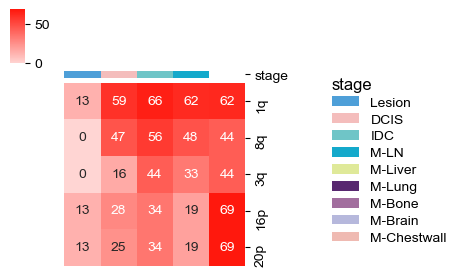

In [4]:
# Figure 1E (middle panel)

plotdata1 = plotdata.copy()
plotdata1.columns = plotdata1.columns.map(lambda x: (x[0], 'M-Distant') if x[1].startswith('M-') and x[1] != 'M-LN' else x)
group = plotdata1.droplevel(0, 1).applymap(lambda x: 0 if x != 1 else x).groupby('stage', axis=1, level=0, sort=False)
plotdata1 = group.sum().div(group.size()) * 100
cmap = mcolors.LinearSegmentedColormap.from_list('linear_red', ['white', '#ffd6d4', '#ff180d'], N=256)

ax = heatmap(plotdata1, lut=lut, cmap=cmap, figsize=(3, 3), annot=True, vmax=plotdata1.max().max(), vmin=0)
ax.savefig('../figure/fig1/figure_1E_middle_panel_heatmap.pdf', bbox_inches='tight')